In [1]:
!pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install wurlitzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tensorflow_decision_forests as tfdf

import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/7 SEMESTRE/BLOQUE 2/RETO/randomForest/viajes_universidades_por_hora_100km_final.csv')
df

,timestamp,universidad,comuna_origen,tipo_de_viaje,tipo_de_universidad,tiene_residencia,count,tamaño_uni,n_carreras
0,0,Campus Andrés Bello Uchile,Conchalí,0,0,1,1,45000,53
1,0,Campus Andrés Bello Uchile,Huechuraba,0,0,1,1,45000,53
2,0,Campus Andrés Bello Uchile,Lo Espejo,0,0,1,1,45000,53
3,0,Campus Andrés Bello Uchile,Providencia,0,0,1,7,45000,53
4,0,Campus Andrés Bello Uchile,Quilicura,0,0,1,1,45000,53
...,...,...,...,...,...,...,...,...,...
1823,23,UDP Facultad de economía y empresas,Colina,0,1,0,1,26400,14
1824,23,UDP Facultad de economía y empresas,Huechuraba,0,1,0,4,26400,14
1825,23,UDP Facultad de economía y empresas,Huechuraba,1,1,0,9,26400,14
1826,23,UDP Facultad de economía y empresas,Las Condes,0,1,0,1,26400,14


In [5]:
#df = df[['timestamp','universidad','count']]
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
labels = 'count'

In [7]:
def split_dataset(dataset, test_ratio=0.25):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

In [8]:
train_ds_pd, test_ds_pd = split_dataset(df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

1363 examples in training, 465 examples for testing.


In [9]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label='count',task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label = 'count',task=tfdf.keras.Task.REGRESSION)

In [30]:
model_1 = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION,num_trees=73,max_depth=10)
model_1

Use /tmp/tmps24lg85u as temporary training directory


In [31]:
model_1.fit(x=train_ds)

Reading training dataset...


Training dataset read in 0:00:00.289719. Found 1363 examples.
Training model...
Model trained in 0:00:00.246499
Compiling model...


Model compiled.


In [32]:
model_1.summary()

Model: "random_forest_model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: REGRESSION
Label: "__LABEL"

Input Features (8):
	comuna_origen
	n_carreras
	tamaño_uni
	tiene_residencia
	timestamp
	tipo_de_universidad
	tipo_de_viaje
	universidad

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1.             "__LABEL"  7.733333 ################
    2.    "tiene_residencia"  7.410375 ###############
    3. "tipo_de_universidad"  6.829456 #############
    4.         "tamaño_uni"  6.538099 #############
    5.          "n_carreras"  6.143074 ############
    6.       "tipo_de_viaje"  5.095740 #########
    7.         "universidad"  3.520153 ######
    8.           "timestamp"  2.321203 ###
    9.       "comuna_origen"  0.979453 

Variable Importance:

In [33]:
model_1.compile(metrics=['mape'])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 180ms/step - loss: 0.0000e+00 - mape: 92.5328

loss: 0.0000
mape: 92.5328


In [93]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0)

In [20]:
model_1.make_inspector().evaluation()

Evaluation(num_examples=1403, accuracy=None, loss=None, rmse=5.329923912057533, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
model_1.make_inspector().training_logs()

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=669, accuracy=None, loss=None, rmse=13.992154770630767, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=1796, accuracy=None, loss=None, rmse=14.119167492936784, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=1811, accuracy=None, loss=None, rmse=14.128277169787433, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=31, evaluation=Evaluation(num_examples=1811, accuracy=None, loss=None, rmse=14.165512212296564, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=41, evaluation=Evaluation(num_examples=1811, accuracy=None, loss=None, rmse=14.009244215420843, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=51, evaluation=Evaluation(num_examples=1811, accuracy=None, loss=None, rmse=14.0451126838114, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=61, evaluati

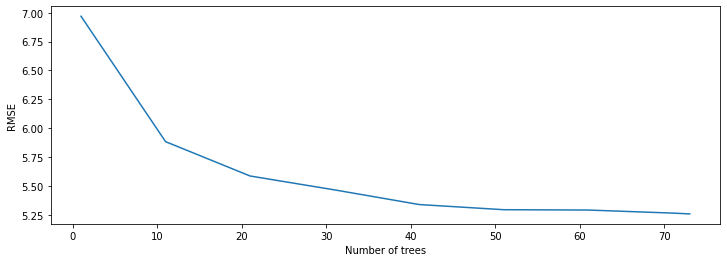

In [36]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE")

plt.show()